# Linear systems
## Existence and inverse

In [1]:
import numpy as np
A = np.array([[1, 1, 1], [2, 1, 3], [3, 1, 6]]) 
A

array([[1, 1, 1],
       [2, 1, 3],
       [3, 1, 6]])

In [2]:
b = np.array([4, 7, 5]) 
b

array([4, 7, 5])

In [3]:
Ainv = np.linalg.inv(A) 
Ainv

array([[-3.,  5., -2.],
       [ 3., -3.,  1.],
       [ 1., -2.,  1.]])

In [4]:
x = np.dot(Ainv, b)
print(x)

x = Ainv @ b
print(x)

[13. -4. -5.]
[13. -4. -5.]


In [5]:
np.linalg.solve(A, b)

array([13., -4., -5.])

In [6]:
M = np.array([[5,3,2],[0,9,1],[0,0,1]])
M

array([[5, 3, 2],
       [0, 9, 1],
       [0, 0, 1]])

In [7]:
np.linalg.matrix_rank(M)

3

In [8]:
M2 = np.array([[1,2,1,0],[0,0,1,1],[0,0,0,0]])
np.linalg.matrix_rank(M2)

2

In [9]:
A_cat = np.column_stack((A,b))
np.linalg.matrix_rank(A_cat)
np.linalg.matrix_rank(A) == A.shape[0]
np.linalg.matrix_rank(M2) == M2.shape[1]

False

Working on size 10
Working on size 20
Working on size 50
Working on size 100
Working on size 200
Working on size 500
Working on size 1000
Working on size 2000
Working on size 5000
Working on size 6000
Working on size 10000


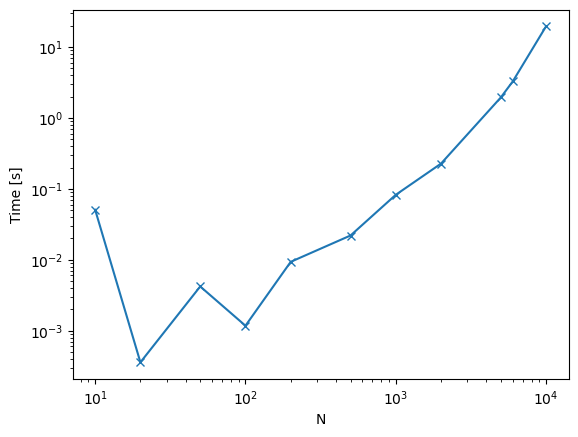

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from gaussjordan import gaussian_eliminate_draft as ge
import time

# Generate random matrices of various sizes 's'. 
# Invert the matrices and store the time required 
# for the inversion. Plot the times vs 's'
s = np.array([10, 20, 50, 100, 200, 500, 1000, 2000,5000,6000,10000])
t_inv = []
for n in s:
    print(f'Working on size {n}')
    A = np.random.rand(n, n)
    start_time = time.time()
    Ainv = np.linalg.inv(A)
    t_inv.append(time.time() - start_time)

plt.loglog(s, t_inv, 'x-')
plt.xlabel('N')
plt.ylabel('Time [s]')
plt.show()

## Direct solvers
### Gauss Jordan Elimination - step-by-step

In [10]:
A = np.array([[1, 1, 1], [2, 1, 3], [3, 1, 6]]) 
b = np.array([4, 7, 5])
A_org = A.copy()
b_org = b.copy()

print(f'Before:\n{np.c_[A_org,b_org]}\n')

d10 = A[1,0] / A[0,0]

print(f'Use {d10} to eliminate element A[1,0]\n')

A[1,0] = A[1,0] - A[0,0] * d10
A[1,1] = A[1,1] - A[0,1] * d10
A[1,2] = A[1,2] - A[0,2] * d10
b[1] = b[1] - b[0] * d10

print(f'After:\n{np.column_stack((A,b))} ')

Before:
[[1 1 1 4]
 [2 1 3 7]
 [3 1 6 5]]

Use 2.0 to eliminate element A[1,0]

After:
[[ 1  1  1  4]
 [ 0 -1  1 -1]
 [ 3  1  6  5]] 


In [11]:
d20 = A[2, 0] / A[0, 0]

print(f'Use {d20} to eliminate element A[1,0]\n')

A[2, 0] = A[2, 0] - A[0, 0] * d20
A[2, 1] = A[2, 1] - A[0, 1] * d20
A[2, 2] = A[2, 2] - A[0, 2] * d20
b[2] = b[2] - b[0] * d20

print(f'After:\n{np.column_stack((A,b))} ')

Use 3.0 to eliminate element A[1,0]

After:
[[ 1  1  1  4]
 [ 0 -1  1 -1]
 [ 0 -2  3 -7]] 


In [12]:
d21 = A[2, 1] / A[1, 1]
A[2, 1] = A[2, 1] - A[1, 1] * d21
A[2, 2] = A[2, 2] - A[1, 2] * d21
b[2] = b[2] - b[1] * d21

print(f'\nAfter:\n{np.column_stack((A,b))} ')


After:
[[ 1  1  1  4]
 [ 0 -1  1 -1]
 [ 0  0  1 -5]] 


In [13]:
x = np.zeros_like(b)
x[2] = b[2] / A[2,2]
x[1] = (b[1] - A[1,2] * x[2]) / A[1,1]
x[0] = (b[0] - A[0,1] * x[1] - A[0,2] * x[2]) / A[0,0]
x

array([13, -4, -5])

In [15]:
A[0,1] = 3

In [16]:
A

array([[ 1,  3,  1],
       [ 0, -1,  1],
       [ 0,  0,  1]])

In [24]:
from gaussjordan import gaussian_eliminate_v1 as ge
from gaussjordan import backsubstitution_v1 as bs

A = np.array([[9,9,5,2],[6,7,1,3],[6,4,3,5],[2,6,2,1]])
b = np.array([7,4,10,1])
Aprime,bprime = ge(A,b)
print(Aprime, bprime)

sol = bs(Aprime,bprime)
print(sol)

sol2 = np.linalg.solve(A,b)
print(sol2)

print(sol == sol2)

np.isclose(sol,sol2)

[[ 9.          9.          5.          2.        ]
 [ 0.          1.         -2.33333333  1.66666667]
 [ 0.          0.         -5.          7.        ]
 [ 0.          0.          0.          8.2       ]] [ 7.         -0.66666667  4.         10.28888889]
[ 0.49322493 -0.52574526  0.95663957  1.25474255]
[ 0.49322493 -0.52574526  0.95663957  1.25474255]
[False False False False]


array([ True,  True,  True,  True])

In [3]:
import numpy as np
from gaussjordan import gaussian_eliminate_partial_pivot as ge
from gaussjordan import backsubstitution_v1 as bs
A = np.array([[0,2,1],[3,2,1],[1,1,1]])
b = np.array([4,3,10])

print(A)
Ag,bg = ge(A,b)
print(Ag)

[[0 2 1]
 [3 2 1]
 [1 1 1]]
[[3.         2.         1.        ]
 [0.         0.33333333 0.66666667]
 [0.         0.         0.        ]]


In [1]:
import numpy as np
from scipy.linalg import lu
from gaussjordan import backsubstitution_v1 as backsubstitution
from gaussjordan import forwardsubstitution

# Example usage
A = np.random.rand(5, 5) # Get random matrix
P, L, U = lu(A)
# Get L, U and P
b = np.random.rand(5)
# Random b vector
d = P @ b
# Permute b vector
y = forwardsubstitution(L, d)
# Can also do y=L\d
x = backsubstitution(U, y)
# Can also do x=U\y
rnorm = np.linalg.norm(A @ x - b) # Residual

IndexError: invalid index to scalar variable.

array([3, 2, 1])

TypeError: 'NoneType' object is not callable